In [142]:
#Plot of confirmed Corona cases in selected countries.
#Last update: 2020-03-17, 9:00, JL

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#https://github.com/CSSEGISandData/COVID-19
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn_confirmed='time_series_19-covid-Confirmed.csv'
fn_deaths='time_series_19-covid-Deaths.csv'
fn_population='https://raw.githubusercontent.com/datasets/population/master/data/population.csv'

In [143]:
def getJHUdata(fn,valName='cases'):
    df = pd.read_csv(fn,index_col=None)
    df=df.drop(['Lat','Long'],axis=1)
    df=df.set_index([*df.columns[:2]])
    df=df.stack().reset_index()
    df.columns=['state','country','date',valName]
    df.date=pd.to_datetime(df.date)
    df=df.groupby(['country','date']).sum().reset_index()
    return df

In [144]:
dfc = getJHUdata(url+fn_confirmed)
dfc.tail()

,country,date,cases
8507,Vietnam,2020-03-13,47
8508,Vietnam,2020-03-14,53
8509,Vietnam,2020-03-15,56
8510,Vietnam,2020-03-16,61
8511,Vietnam,2020-03-17,66


In [145]:
dfd = getJHUdata(url+fn_deaths,'deaths')
dfd.tail()

,country,date,deaths
8507,Vietnam,2020-03-13,0
8508,Vietnam,2020-03-14,0
8509,Vietnam,2020-03-15,0
8510,Vietnam,2020-03-16,0
8511,Vietnam,2020-03-17,0


In [146]:
dfp = pd.read_csv(fn_population)
dfp=dfp[dfp.Year==dfp.Year.max()]
dfp.columns=[*dfp.columns[:-1],'population']
dfp.head()

,Country Name,Country Code,Year,population
56,Arab World,ARB,2016,4.064527e+08
113,Caribbean small states,CSS,2016,7.245472e+06
170,Central Europe and the Baltics,CEB,2016,1.029741e+08
227,Early-demographic dividend,EAR,2016,3.170542e+09
284,East Asia & Pacific,EAS,2016,2.296786e+09


In [147]:
df=dfc.merge(dfd,on=[*dfc.columns[:2]])
df=df.merge(dfp[[dfp.columns[0],'population']],how='left',left_on='country',right_on=dfp.columns[0])
df=df.drop('Country Name',axis=1)
df.head()

,country,date,cases,deaths,population
0,Afghanistan,2020-01-22,0,0,34656032.0
1,Afghanistan,2020-01-23,0,0,34656032.0
2,Afghanistan,2020-01-24,0,0,34656032.0
3,Afghanistan,2020-01-25,0,0,34656032.0
4,Afghanistan,2020-01-26,0,0,34656032.0


In [148]:
df['cdRatio']=df.deaths/df.cases
df['casePerPop']=df.cases/df.population

In [149]:
allCountries=sorted(df.country.unique())
for a,b,c in zip(allCountries[::3],allCountries[1::3],allCountries[2::3]):
    print('{:<30}{:<30}{:<}'.format(a,b,c))

Afghanistan                   Albania                       Algeria
Andorra                       Antigua and Barbuda           Argentina
Armenia                       Aruba                         Australia
Austria                       Azerbaijan                    Bahrain
Bangladesh                    Barbados                      Belarus
Belgium                       Benin                         Bhutan
Bolivia                       Bosnia and Herzegovina        Brazil
Brunei                        Bulgaria                      Burkina Faso
Cambodia                      Cameroon                      Canada
Central African Republic      Chile                         China
Colombia                      Congo (Brazzaville)           Congo (Kinshasa)
Costa Rica                    Cote d'Ivoire                 Croatia
Cruise Ship                   Cuba                          Cyprus
Czechia                       Denmark                       Dominican Republic
Ecuador                  

In [150]:
plotCountries=['Germany','Italy','Spain','Iran','Portugal', 'Korea, South','US']
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')

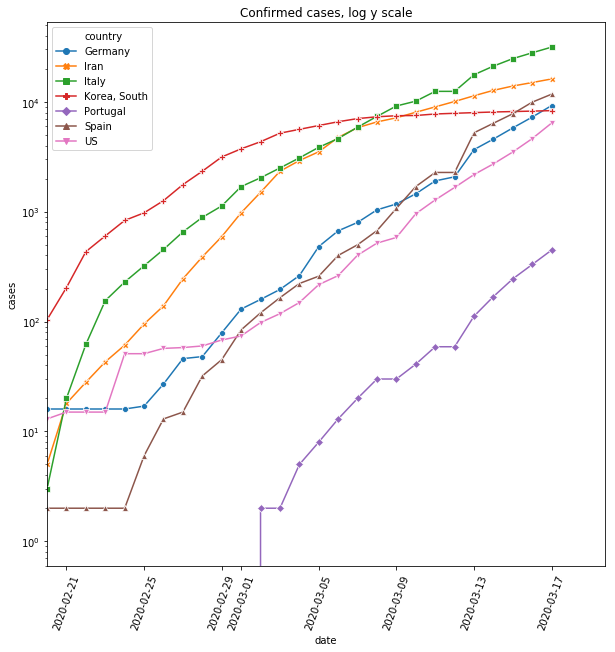

In [168]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)
ax = g.axes
ax.set_yscale('log')
plt.title('Confirmed cases, log y scale')
plt.xlim(left=plotStartDate)
plt.xticks(rotation=70);

Note similar slopes of european countries. Italy took of earlier

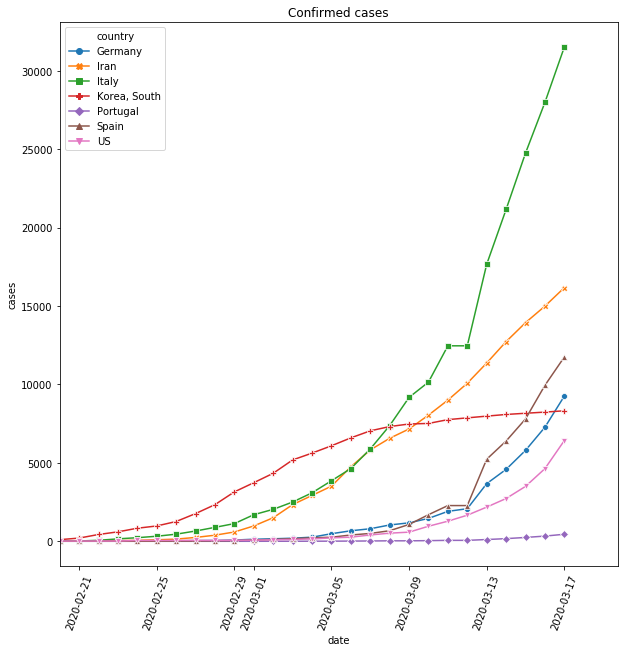

In [167]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Confirmed cases');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

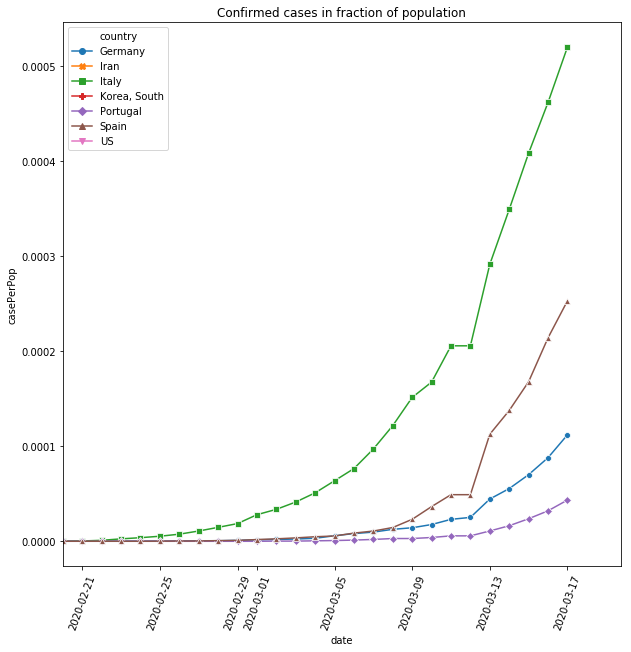

In [166]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='casePerPop',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Confirmed cases in fraction of population');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

In [154]:
ix=df.country.isin([plotCountries[0]])
df.loc[ix][-3:]

,country,date,cases,deaths,population,cdRatio,casePerPop
2965,Germany,2020-03-15,5795,11,82667685.0,0.001898,0.000070
2966,Germany,2020-03-16,7272,17,82667685.0,0.002338,0.000088
2967,Germany,2020-03-17,9257,24,82667685.0,0.002593,0.000112


In [155]:
ix=df.country.isin([plotCountries[-1]])
df.loc[ix][-3:]

,country,date,cases,deaths,population,cdRatio,casePerPop
8117,US,2020-03-15,3499,63,NaN,0.018005,NaN
8118,US,2020-03-16,4632,85,NaN,0.018351,NaN
8119,US,2020-03-17,6421,108,NaN,0.016820,NaN


# Plot cases aligned to date of crossing 100 cases

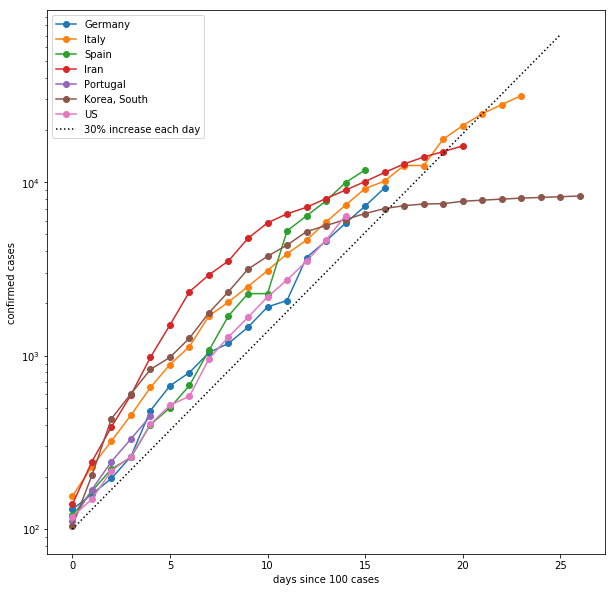

In [165]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        ax.plot(ts[inflect:],'o-',label=c)
    
t=np.linspace(0,25,100)
e=100*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')
plt.ylabel('confirmed cases');

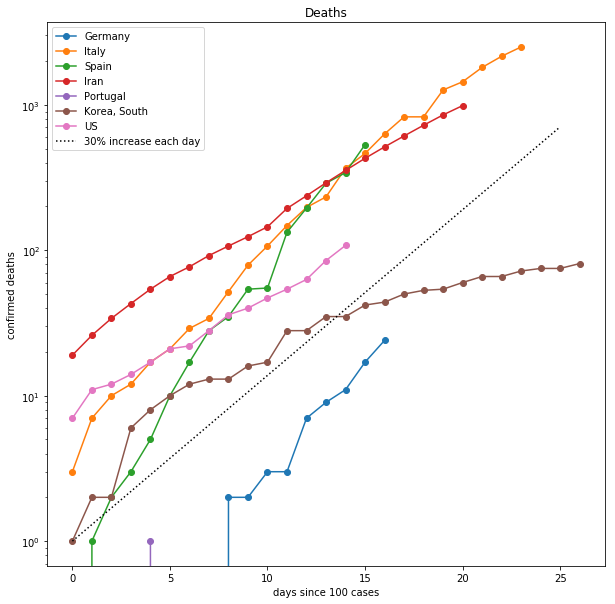

In [157]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        tsDeaths=df[ix].deaths.values
        ax.plot(tsDeaths[inflect:],'o-',label=c)
    
t=np.linspace(0,25,100)
e=1*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')
plt.ylabel('confirmed deaths')
plt.title('Deaths');

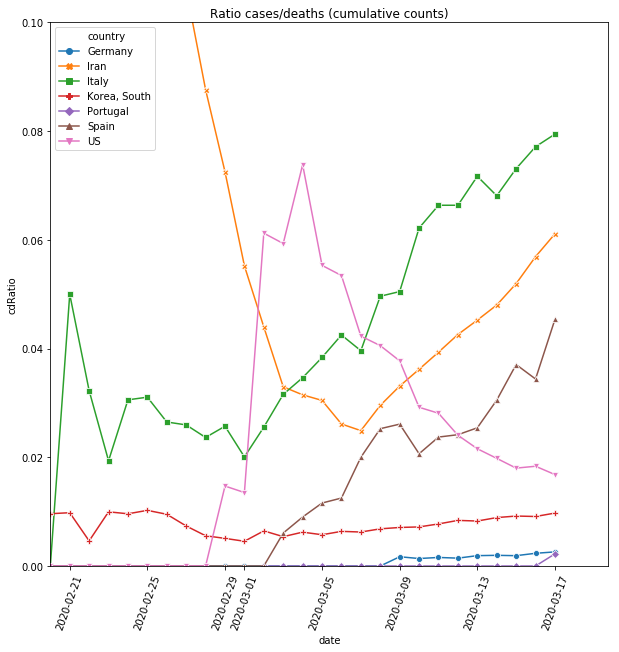

In [158]:
plt.subplots(figsize=(10,10))
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')
g=sns.lineplot(data=df[ix],
             x='date',
             y='cdRatio',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.xticks(rotation=70);
plt.ylim([0,.1])
plt.title('Ratio cases/deaths (cumulative counts)')
plt.xlim(left=plotStartDate);

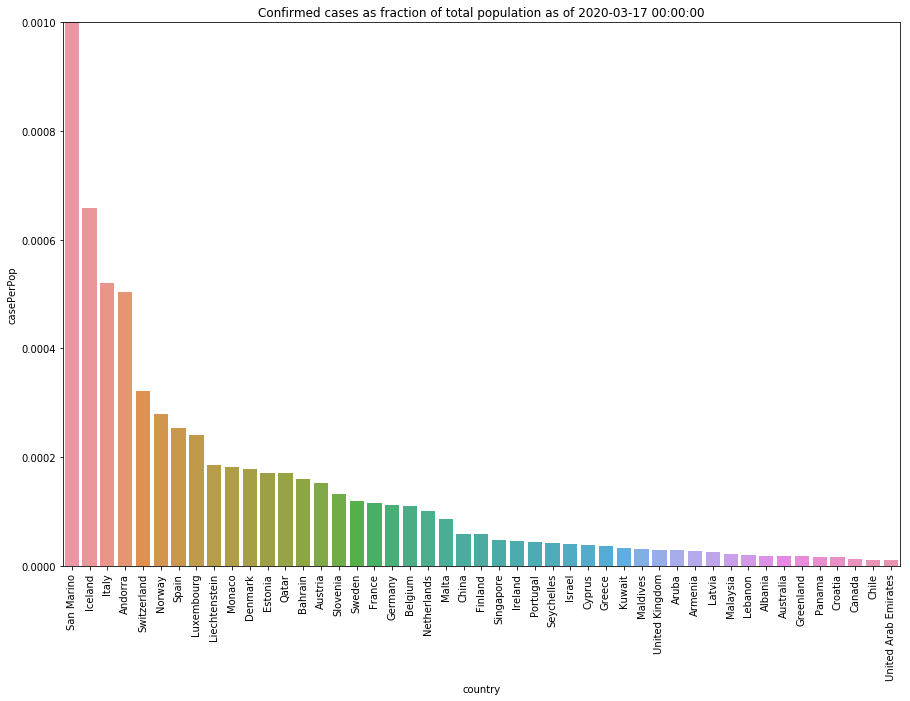

In [164]:
plt.subplots(figsize=(15,10))
ix=(df.date==df.date.max())&(df.casePerPop>0.00001)
sns.barplot(data=df[ix].sort_values(by=['casePerPop'],ascending=False),
            x='country',y='casePerPop')
plt.ylim([0,.001])
plt.title('Confirmed cases as fraction of total population as of '+str(df.date.max()))
plt.xticks(rotation=90);